## Método de Ondas Planas

Programa para calcular la estructura de bandas de un cristal
Fotónico 1D por medio del método de ondas planas PWE  
Referencia: Photonics Crystals, Physics and practical modeling  
Igor A. Sukhoivanov and Igor V. Guryev

In [2]:
import numpy as np
import matplotlib.pyplot as plt

l1 = 0.3e-6
l2 = 0.5e-6

eps1 = 1
eps2 = 9

a = l1+l2
numG = 100

G  = np.arange(-numG* 2 * np.pi/a, numG * 2* np.pi/a, 2* np.pi/a)
G1 = np.arange(-numG* 2 * np.pi/a, numG * 2* np.pi/a, 2* np.pi/a)
chi = np.zeros((len(G),len(G1)),dtype = 'complex_')

for i in range(len(G)):
    for J in range(len(G1)):
        if(G[i] - G1[J]) == 0:
            chi[i,J] = 1/(l1+l2) * (1/eps1 * l1 + 1/eps2*l2)
        else:
            chi[i,J] = 1j /(l1+l2)/(G[i]-G1[J]) * ((1/eps1 * (np.exp(-1j * (G[i]-G1[J]) * l1) - 1)) + (1/eps2 * (np.exp(-1j * (G[i]-G1[J]) * (l1+l2)) - np.exp(-1j * (G[i]-G1[J])*l1))))


In [3]:
print(chi)
print(chi.shape)

[[ 4.44444444e-01+0.00000000e+00j  1.00035146e-01+2.41506207e-01j
  -7.07355303e-02+7.07355303e-02j ... -5.07792621e-04+2.10334590e-04j
   7.14500306e-04+7.14500306e-04j -5.02689177e-04+1.21359903e-03j]
 [ 1.00035146e-01-2.41506207e-01j  4.44444444e-01+0.00000000e+00j
   1.00035146e-01+2.41506207e-01j ...  1.41903707e-15+1.44358225e-03j
  -5.07792621e-04+2.10334590e-04j  7.14500306e-04+7.14500306e-04j]
 [-7.07355303e-02-7.07355303e-02j  1.00035146e-01-2.41506207e-01j
   4.44444444e-01+0.00000000e+00j ...  5.13000750e-04+2.12491868e-04j
   1.41903707e-15+1.44358225e-03j -5.07792621e-04+2.10334590e-04j]
 ...
 [-5.07792621e-04-2.10334590e-04j  1.41903707e-15-1.44358225e-03j
   5.13000750e-04-2.12491868e-04j ...  4.44444444e-01+0.00000000e+00j
   1.00035146e-01+2.41506207e-01j -7.07355303e-02+7.07355303e-02j]
 [ 7.14500306e-04-7.14500306e-04j -5.07792621e-04-2.10334590e-04j
   1.41903707e-15-1.44358225e-03j ...  1.00035146e-01-2.41506207e-01j
   4.44444444e-01+0.00000000e+00j  1.00035146e-

In [4]:
M = np.zeros((len(G),len(G1)),dtype = 'complex_')
ks = np.linspace(-2*np.pi/a, 2*np.pi/a,100)
Ks = list()
dispe = list()


In [5]:
for k in range(len(ks)):
    for i in range(len(G)):
        for j in range(len(G1)):
            M[j,i] = chi[j,i] * (ks[k] + G1[j]) * (ks[k] + G[i])
    V = np.linalg.eig(M)[0]
    dispe.append(np.sqrt(np.sort(np.abs(V))) * a/2/np.pi)
    Ks.append(ks[k] * a/np.pi)




In [6]:
print(dispe[0])

[9.14733622e-08 3.72330997e-01 4.97823284e-01 8.39214166e-01
 9.63236285e-01 1.33333543e+00 1.33732335e+00 1.70794969e+00
 1.83487878e+00 2.17623245e+00 2.29878184e+00 2.66668346e+00
 2.67458866e+00 3.04370656e+00 3.17184649e+00 3.51341527e+00
 3.63421944e+00 4.00005731e+00 4.01204880e+00 4.37944660e+00
 4.50901176e+00 4.85046622e+00 4.96973728e+00 5.33346993e+00
 5.34933142e+00 5.71546217e+00 5.84598215e+00 6.18788012e+00
 6.30510159e+00 6.66693812e+00 6.68701805e+00 7.05138009e+00
 7.18333972e+00 7.52503802e+00 7.64063946e+00 8.00047403e+00
 8.02439714e+00 8.38773966e+00 8.52038870e+00 8.86278741e+00
 8.97598899e+00 9.33410479e+00 9.36242050e+00 9.72390783e+00
 9.85804049e+00 1.02001395e+01 1.03116029e+01 1.06678364e+01
 1.06999877e+01 1.10607226e+01 1.11952555e+01 1.15383598e+01
 1.16470053e+01 1.20017214e+01 1.20384927e+01 1.23972412e+01
 1.25333368e+01 1.28760189e+01 1.29827681e+01 1.33357449e+01
 1.33763651e+01 1.37346636e+01 1.38708283e+01 1.42148960e+01
 1.43183107e+01 1.467001

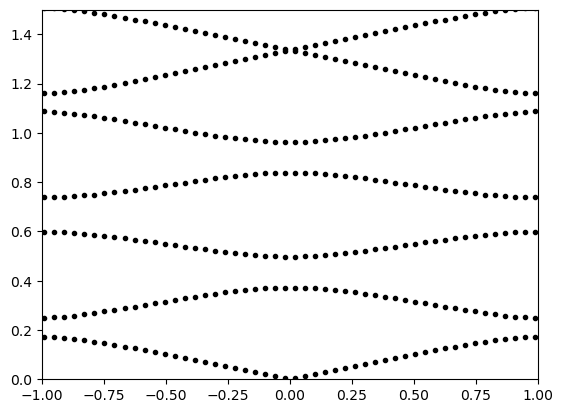

In [7]:
import matplotlib.pyplot as plt

for i in range(len(Ks)):
    plt.plot([Ks[i]] * len(dispe[i]), dispe[i],'.',color='black')
    plt.xlim([-1,1])
    plt.ylim([0,1.5])

## Campo Eléctrico

In [50]:
def Field(x):
    global a, numG, k, Vs, in1
    H = 0
    countt = 0
    for G in np.arange(-numG * 2 * np.pi / a, numG * 2 * np.pi / a + 0.0001, 2 * np.pi / a):
        countt += 1
        H += Vs[countt - 1, in1] * np.exp(1j * (k + G) * x)
    return H

In [9]:
from scipy.linalg import eigh

def calculate_field(x, a, numG, k, Vs, in1):
    H = 0
    countt = 0
    for G in np.arange(-numG*2*np.pi/a, numG*2*np.pi/a, 2*np.pi/a):
        countt += 1
        H += Vs[countt,in1]*np.exp(1j*(k+G)*x)
    return H

k = np.pi/(15*a)
in1 = 20

countG1 = 1
countG = 1
M1 = np.zeros((2*numG+1, 2*numG+1), dtype=complex)

for G in np.arange(-numG*2*np.pi/a, numG*2*np.pi/a, 2*np.pi/a):
    for G1 in np.arange(-numG*2*np.pi/a, numG*2*np.pi/a, 2*np.pi/a):
        M1[countG1-1,countG-1] = chi[countG1-1,countG-1]*(k+G1)*(k+G)
        countG += 1
    countG1 += 1
    countG = 1

countG1 = 1

eigvals, eigvecs = eigh(M1)
ind = np.argsort(eigvals)
Ds = eigvals[ind]
Vs = eigvecs[:,ind]

freq = np.sqrt(abs(Ds[in1-1]))*a/2/np.pi

div = 15
div1 = 1500
x = np.linspace(0, a, div1+1)
FieldE = np.abs(calculate_field(x, a, numG, k, Vs, in1))**2

alt = np.max(np.abs(FieldE))
x1 = np.linspace(0, alt, div+1)
y1 = l1*np.ones(div+1)

plt.figure(2)
plt.plot(y1, x1, linewidth=5)
plt.plot(x, FieldE, linewidth=2)
plt.xlabel('x(m)', fontsize=20)
plt.ylabel('E (V/m)', fontsize=20)
#plt.ylim([0, alt])
plt.xlim([0, a])
plt.show()


ValueError: operands could not be broadcast together with shapes (200,200) (201,201) 